In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
import warnings
from sklearn.preprocessing import StandardScaler

 
warnings.filterwarnings("ignore")
%matplotlib inline 

In [2]:
df = pd.read_excel("etf_data_final.xlsx")
r_df = pd.read_excel("random_data_final.xlsx")

In [3]:
df.head()

,Unnamed: 0,index,date,SPY_p,IWM_p,EEM_p,TLT_p,LQD_p,TIP_p,IYR_p,...,month_8,month_9,month_10,month_11,month_12,MON,TUE,WED,THU,FRI
0,0,250,2011-12-29,107.496193,66.057526,31.844088,98.016830,85.749313,102.159256,42.352482,...,0,0,0,0,1,0,0,0,1,0
1,1,251,2011-12-30,106.967743,65.701195,31.869280,98.333130,86.112694,102.124252,42.144760,...,0,0,0,0,1,0,0,0,0,1
2,2,252,2012-01-03,108.672401,66.788040,32.843678,96.857132,86.044540,102.089241,42.404408,...,0,0,0,0,0,0,1,0,0,0
3,3,253,2012-01-04,108.842880,66.422791,32.658875,95.705551,86.112694,102.185547,41.929615,...,0,0,0,0,0,0,0,1,0,0
4,4,254,2012-01-05,109.132668,66.796974,32.516071,95.535225,85.741760,102.378059,42.233788,...,0,0,0,0,0,0,0,0,1,0


In [4]:
r_df.head()

,Unnamed: 0,index,date,SPY_p,IWM_p,EEM_p,TLT_p,LQD_p,TIP_p,IYR_p,...,month_8,month_9,month_10,month_11,month_12,MON,TUE,WED,THU,FRI
0,0,250,2011-12-29,107.496193,66.057526,31.844088,98.016830,85.749313,102.159256,42.352482,...,0,0,0,0,1,0,0,0,1,0
1,1,251,2011-12-30,106.967743,65.701195,31.869280,98.333130,86.112694,102.124252,42.144760,...,0,0,0,0,1,0,0,0,0,1
2,2,252,2012-01-03,108.672401,66.788040,32.843678,96.857132,86.044540,102.089241,42.404408,...,0,0,0,0,0,0,1,0,0,0
3,3,253,2012-01-04,108.842880,66.422791,32.658875,95.705551,86.112694,102.185547,41.929615,...,0,0,0,0,0,0,0,1,0,0
4,4,254,2012-01-05,109.132668,66.796974,32.516071,95.535225,85.741760,102.378059,42.233788,...,0,0,0,0,0,0,0,0,1,0


In [5]:
df.drop(['Unnamed: 0'], axis = 1, inplace=True)
r_df.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [6]:
print(df.columns)
print(r_df.columns)

Index(['index', 'date', 'SPY_p', 'IWM_p', 'EEM_p', 'TLT_p', 'LQD_p', 'TIP_p',
       'IYR_p', 'GLD_p',
       ...
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'MON', 'TUE',
       'WED', 'THU', 'FRI'],
      dtype='object', length=282)
Index(['index', 'date', 'SPY_p', 'IWM_p', 'EEM_p', 'TLT_p', 'LQD_p', 'TIP_p',
       'IYR_p', 'GLD_p',
       ...
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12', 'MON', 'TUE',
       'WED', 'THU', 'FRI'],
      dtype='object', length=282)


In [7]:
df_col = ['SPY', 'IWM', 'EEM', 'TLT', 'LQD', 'TIP', 'IYR',
       'GLD', 'FXE']

dummy = ['month_1', 
         'month_2', 
         'month_3', 
         'month_4', 
         'month_5', 
         'month_6', 
         'month_7', 
         'month_8', 
         'month_9',
         'month_10',
         'month_11',
         'month_12',
         'MON', 'TUE','WED', 'THU', 'FRI']

td = [1, 3, 5, 10, 20, 40, 60, 120, 250]

In [8]:
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
lw=2

SPY
Real Data Processing for horizon =  1
AUC good =  0.905823827086371


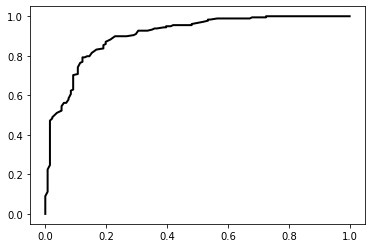

Random Data Processing for horizon =  1
Random data AUC =  0.905823827086371


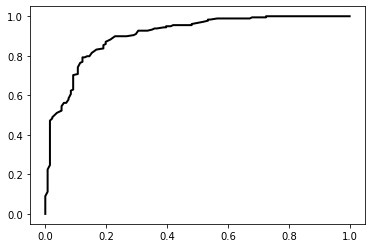

C =  200
Real_data_accuracy   :  0.8447
Random data_accuracy :  0.835
Gain =  0.0097
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.942341822699441


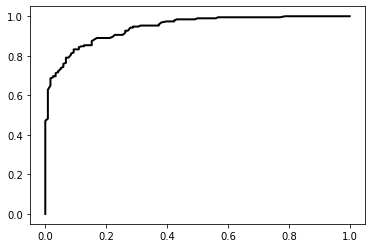

Random Data Processing for horizon =  3
Random data AUC =  0.942341822699441


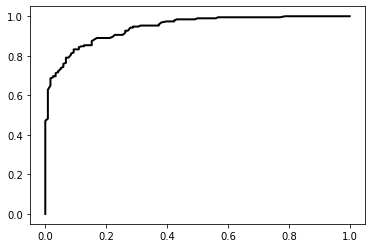

C =  200
Real_data_accuracy   :  0.8608
Random data_accuracy :  0.8576
Gain =  0.0032
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.9485403699482774


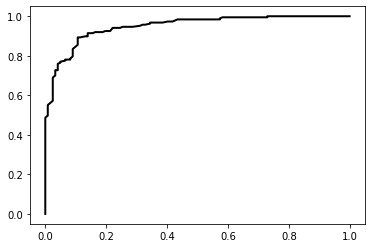

Random Data Processing for horizon =  5
Random data AUC =  0.9485403699482774


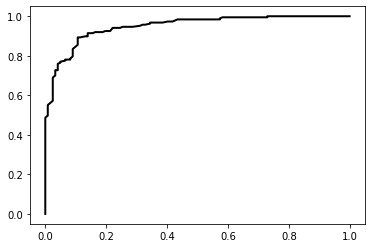

C =  200
Real_data_accuracy   :  0.8867
Random data_accuracy :  0.8738
Gain =  0.0129
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.940989847715736


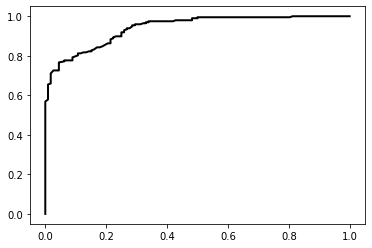

Random Data Processing for horizon =  10
Random data AUC =  0.940989847715736


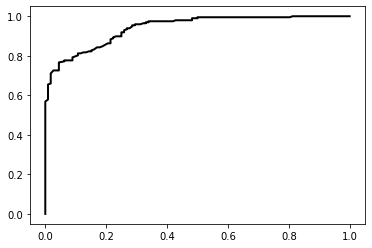

C =  200
Real_data_accuracy   :  0.8511
Random data_accuracy :  0.8479
Gain =  0.0032
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9794577588599982


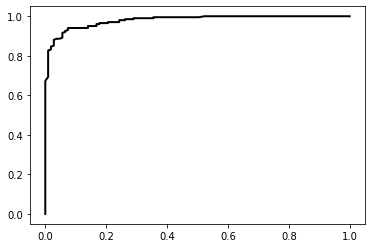

Random Data Processing for horizon =  20
Random data AUC =  0.9794577588599982


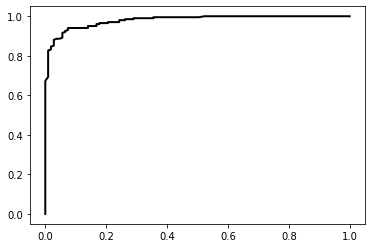

C =  200
Real_data_accuracy   :  0.9061
Random data_accuracy :  0.9191
Gain =  -0.013
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9785628019323671


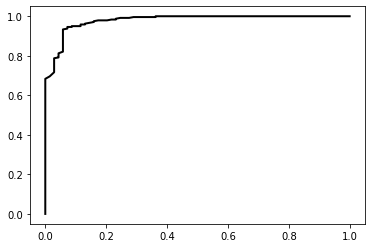

Random Data Processing for horizon =  40
Random data AUC =  0.9785628019323671


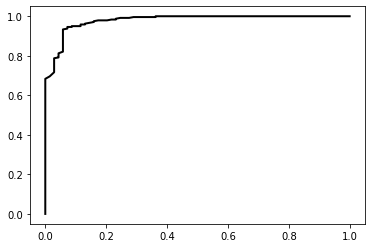

C =  200
Real_data_accuracy   :  0.9385
Random data_accuracy :  0.9417
Gain =  -0.0032
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.989009479324083


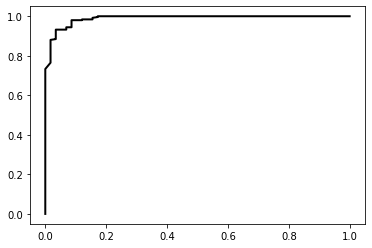

Random Data Processing for horizon =  60
Random data AUC =  0.989009479324083


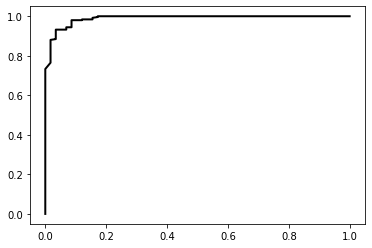

C =  200
Real_data_accuracy   :  0.9612
Random data_accuracy :  0.9612
Gain =  0.0
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.998533393501805


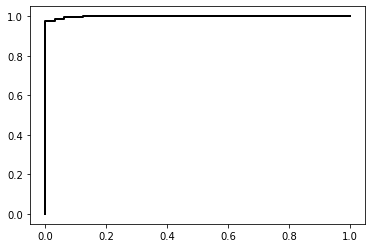

Random Data Processing for horizon =  120
Random data AUC =  0.998533393501805


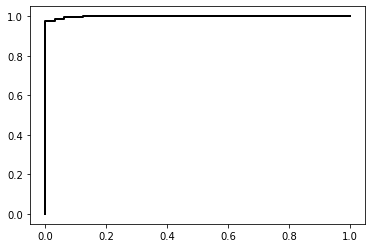

C =  200
Real_data_accuracy   :  0.9838
Random data_accuracy :  0.9806
Gain =  0.0032
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9773908523908523


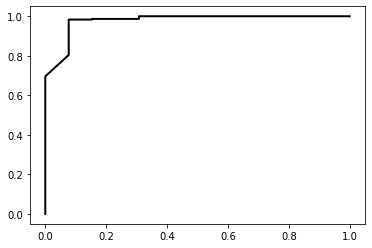

Random Data Processing for horizon =  250
Random data AUC =  0.9773908523908523


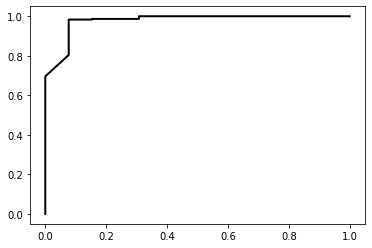

C =  200
Real_data_accuracy   :  0.9773
Random data_accuracy :  0.9773
Gain =  -0.0
---------------------------------------------

IWM
Real Data Processing for horizon =  1
AUC good =  0.8681244743481917


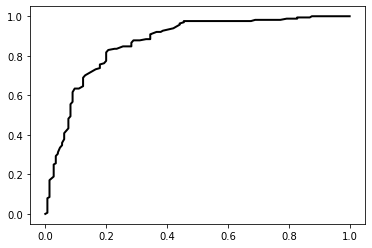

Random Data Processing for horizon =  1
Random data AUC =  0.8681244743481917


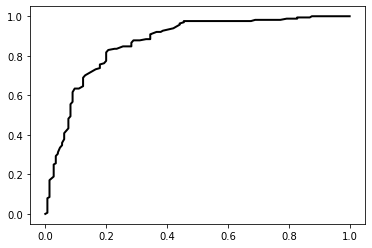

C =  200
Real_data_accuracy   :  0.7994
Random data_accuracy :  0.7735
Gain =  0.0259
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.9335269993164731


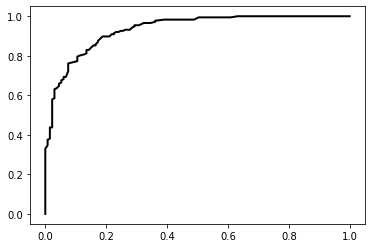

Random Data Processing for horizon =  3
Random data AUC =  0.9335269993164731


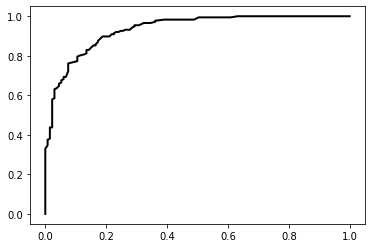

C =  200
Real_data_accuracy   :  0.8544
Random data_accuracy :  0.8576
Gain =  -0.0032
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.9372559837039551


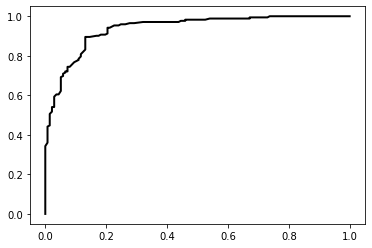

Random Data Processing for horizon =  5
Random data AUC =  0.9372559837039551


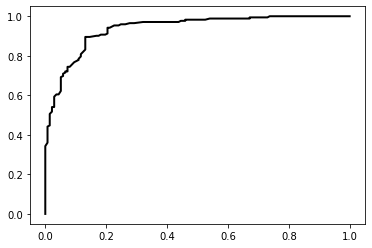

C =  200
Real_data_accuracy   :  0.8706
Random data_accuracy :  0.877
Gain =  -0.0064
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.9424460431654677


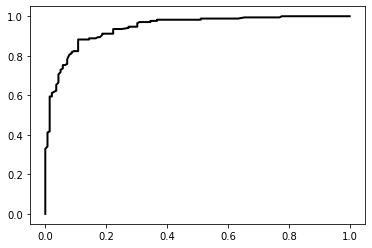

Random Data Processing for horizon =  10
Random data AUC =  0.9424460431654677


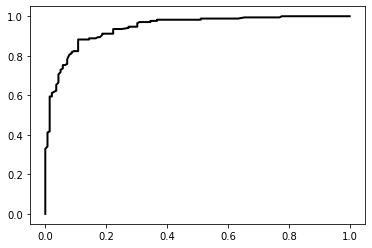

C =  200
Real_data_accuracy   :  0.8641
Random data_accuracy :  0.8673
Gain =  -0.0032
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9614210985178727


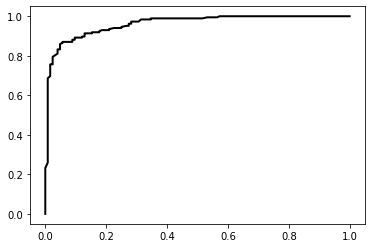

Random Data Processing for horizon =  20
Random data AUC =  0.9614210985178727


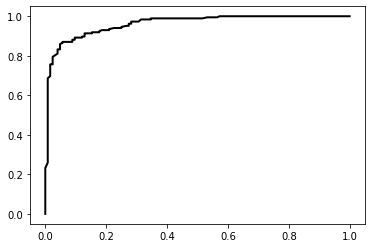

C =  200
Real_data_accuracy   :  0.89
Random data_accuracy :  0.8964
Gain =  -0.0064
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9745121465551573


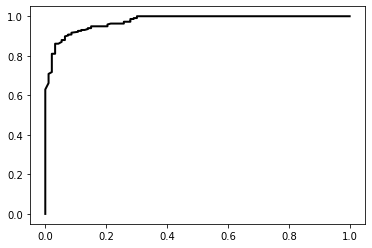

Random Data Processing for horizon =  40
Random data AUC =  0.9745121465551573


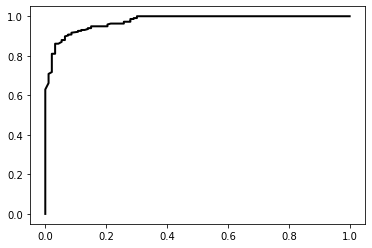

C =  200
Real_data_accuracy   :  0.9029
Random data_accuracy :  0.9029
Gain =  -0.0
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.978409212069517


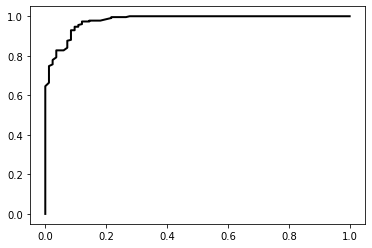

Random Data Processing for horizon =  60
Random data AUC =  0.978409212069517


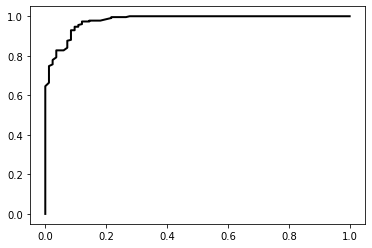

C =  200
Real_data_accuracy   :  0.9385
Random data_accuracy :  0.9353
Gain =  0.0032
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9921786763044951


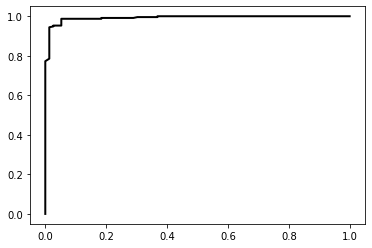

Random Data Processing for horizon =  120
Random data AUC =  0.9921786763044951


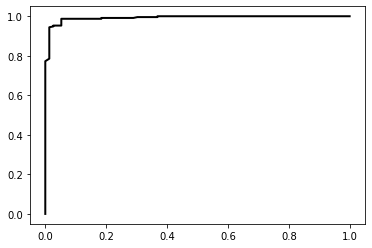

C =  200
Real_data_accuracy   :  0.9773
Random data_accuracy :  0.9676
Gain =  0.0097
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9916429249762583


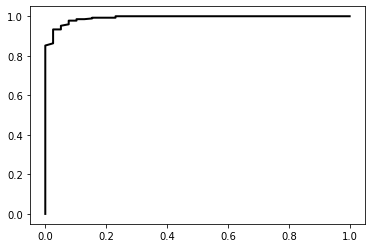

Random Data Processing for horizon =  250
Random data AUC =  0.9916429249762583


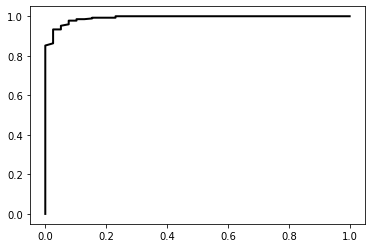

C =  200
Real_data_accuracy   :  0.9709
Random data_accuracy :  0.9676
Gain =  0.0033
---------------------------------------------

EEM
Real Data Processing for horizon =  1
AUC good =  0.8281026202712949


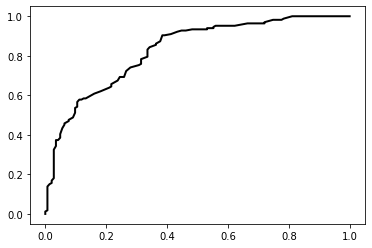

Random Data Processing for horizon =  1
Random data AUC =  0.8281026202712949


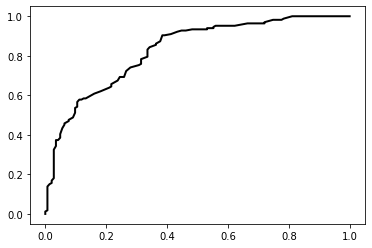

C =  200
Real_data_accuracy   :  0.7152
Random data_accuracy :  0.7346
Gain =  -0.0194
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.8700395989552616


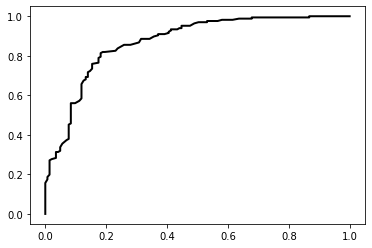

Random Data Processing for horizon =  3
Random data AUC =  0.8700395989552616


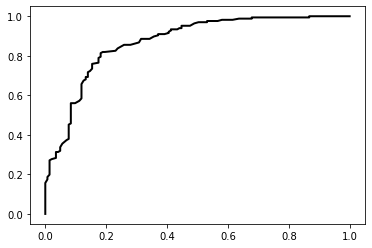

C =  200
Real_data_accuracy   :  0.7832
Random data_accuracy :  0.767
Gain =  0.0162
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.919398105457289


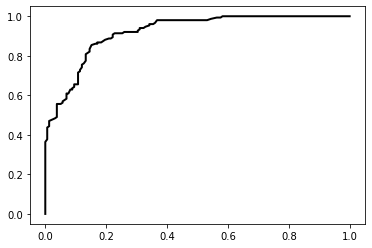

Random Data Processing for horizon =  5
Random data AUC =  0.919398105457289


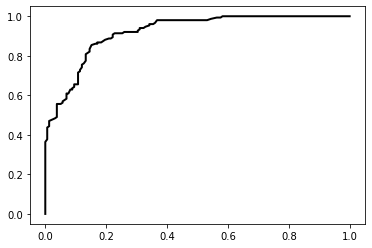

C =  200
Real_data_accuracy   :  0.8414
Random data_accuracy :  0.8511
Gain =  -0.0097
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.9365621594433733


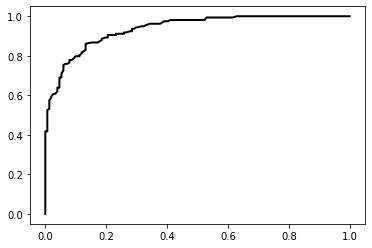

Random Data Processing for horizon =  10
Random data AUC =  0.9365621594433733


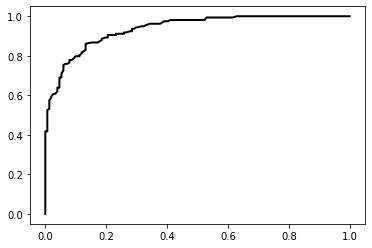

C =  200
Real_data_accuracy   :  0.8479
Random data_accuracy :  0.8511
Gain =  -0.0032
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9740278951817414


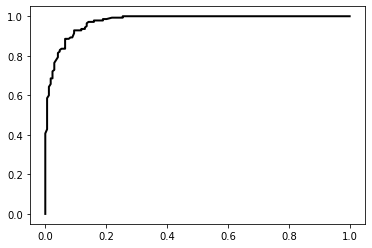

Random Data Processing for horizon =  20
Random data AUC =  0.9740278951817414


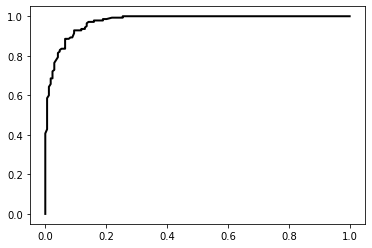

C =  200
Real_data_accuracy   :  0.9061
Random data_accuracy :  0.9061
Gain =  -0.0
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9898190045248868


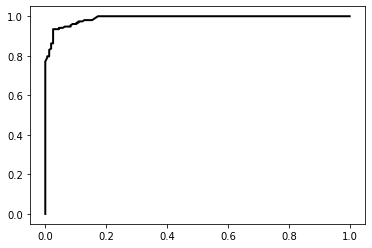

Random Data Processing for horizon =  40
Random data AUC =  0.9898190045248868


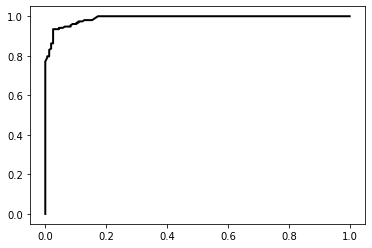

C =  200
Real_data_accuracy   :  0.945
Random data_accuracy :  0.9482
Gain =  -0.0032
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9953067381830372


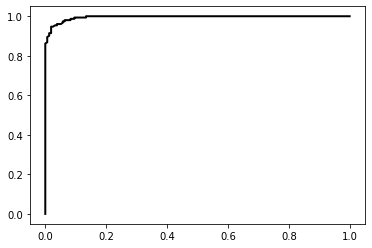

Random Data Processing for horizon =  60
Random data AUC =  0.9953067381830372


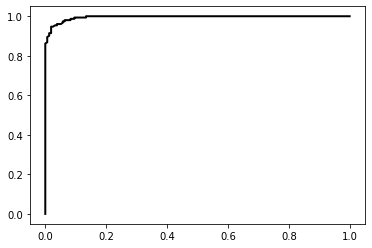

C =  200
Real_data_accuracy   :  0.9579
Random data_accuracy :  0.9612
Gain =  -0.0033
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9951818334171275


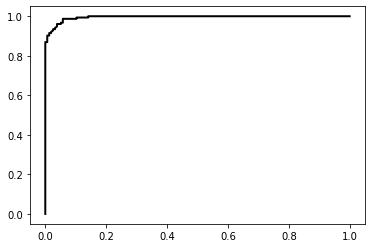

Random Data Processing for horizon =  120
Random data AUC =  0.9951818334171275


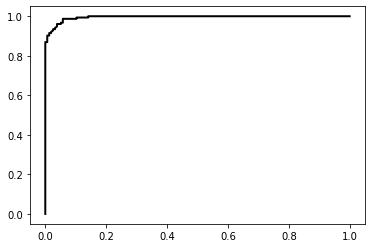

C =  200
Real_data_accuracy   :  0.9547
Random data_accuracy :  0.9547
Gain =  0.0
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9881620851491787


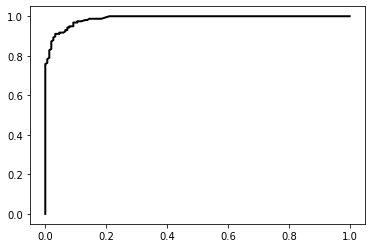

Random Data Processing for horizon =  250
Random data AUC =  0.9881620851491787


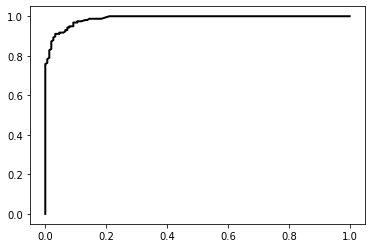

C =  200
Real_data_accuracy   :  0.932
Random data_accuracy :  0.9385
Gain =  -0.0065
---------------------------------------------

TLT
Real Data Processing for horizon =  1
AUC good =  0.8817953020134228


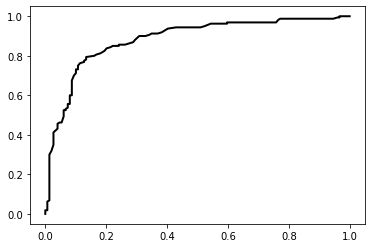

Random Data Processing for horizon =  1
Random data AUC =  0.8817953020134228


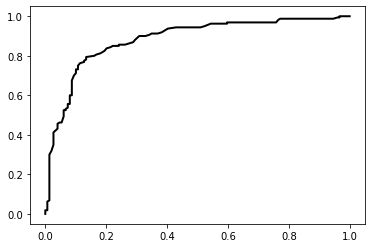

C =  200
Real_data_accuracy   :  0.8155
Random data_accuracy :  0.822
Gain =  -0.0065
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.9355933623868589


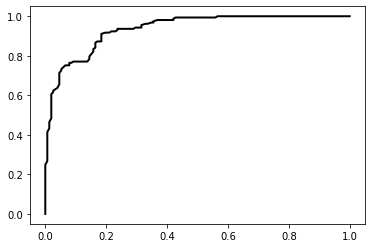

Random Data Processing for horizon =  3
Random data AUC =  0.9355933623868589


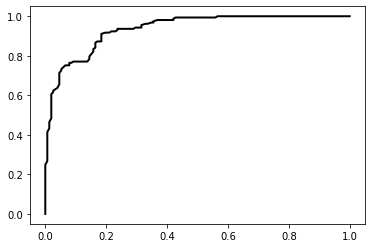

C =  200
Real_data_accuracy   :  0.8544
Random data_accuracy :  0.8608
Gain =  -0.0064
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.9221970839617899


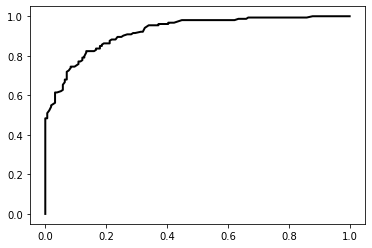

Random Data Processing for horizon =  5
Random data AUC =  0.9221970839617899


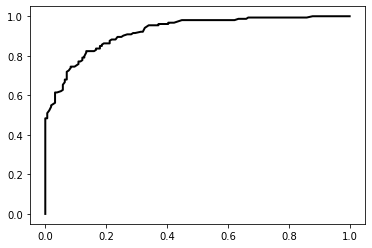

C =  200
Real_data_accuracy   :  0.8317
Random data_accuracy :  0.8285
Gain =  0.0032
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.9275167785234899


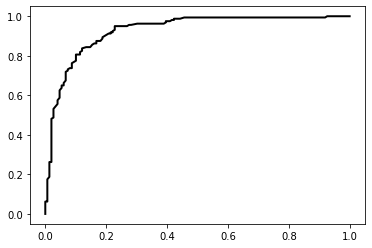

Random Data Processing for horizon =  10
Random data AUC =  0.9275167785234899


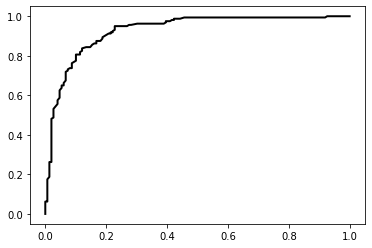

C =  200
Real_data_accuracy   :  0.8511
Random data_accuracy :  0.8608
Gain =  -0.0097
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9806870548806033


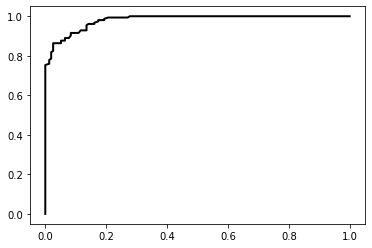

Random Data Processing for horizon =  20
Random data AUC =  0.9806870548806033


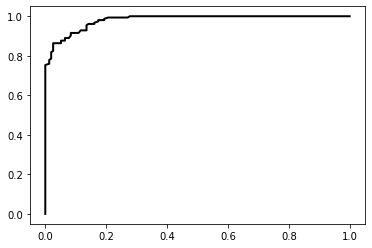

C =  200
Real_data_accuracy   :  0.9159
Random data_accuracy :  0.9061
Gain =  0.0098
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.970934650455927


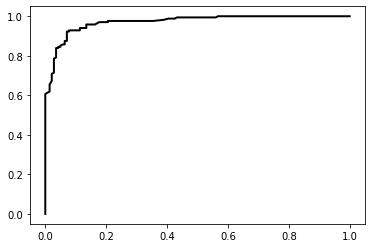

Random Data Processing for horizon =  40
Random data AUC =  0.970934650455927


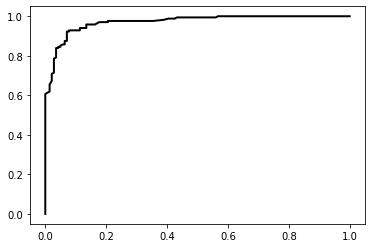

C =  200
Real_data_accuracy   :  0.9256
Random data_accuracy :  0.9191
Gain =  0.0065
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9884865605204588


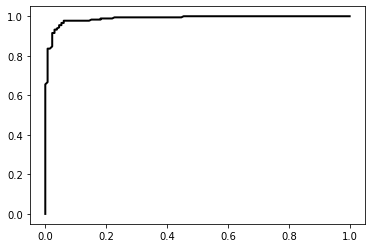

Random Data Processing for horizon =  60
Random data AUC =  0.9884865605204588


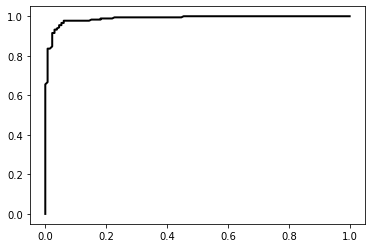

C =  200
Real_data_accuracy   :  0.9547
Random data_accuracy :  0.9612
Gain =  -0.0065
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9948779424585876


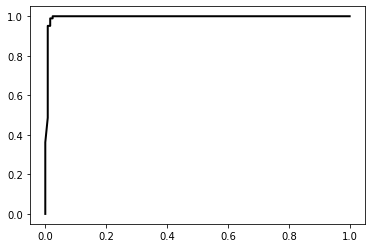

Random Data Processing for horizon =  120
Random data AUC =  0.9948779424585876


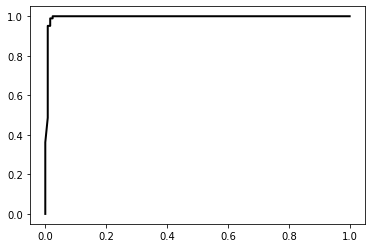

C =  200
Real_data_accuracy   :  0.9838
Random data_accuracy :  0.9806
Gain =  0.0032
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9979460093896715


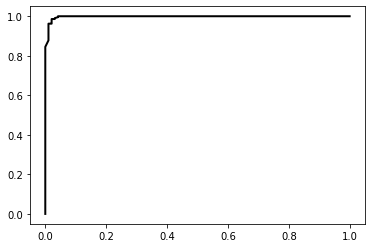

Random Data Processing for horizon =  250
Random data AUC =  0.9979460093896715


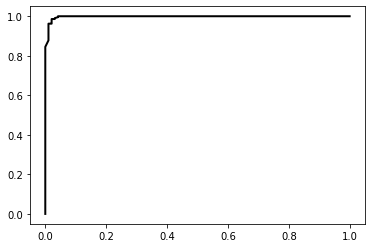

C =  200
Real_data_accuracy   :  0.9838
Random data_accuracy :  0.9806
Gain =  0.0032
---------------------------------------------

LQD
Real Data Processing for horizon =  1
AUC good =  0.8353238015138771


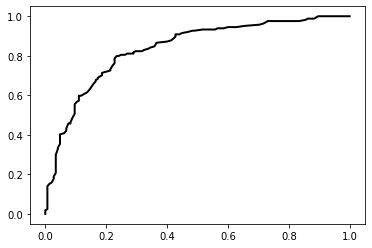

Random Data Processing for horizon =  1
Random data AUC =  0.8353238015138771


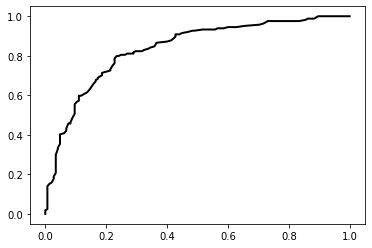

C =  200
Real_data_accuracy   :  0.7799
Random data_accuracy :  0.7638
Gain =  0.0161
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.9133738601823708


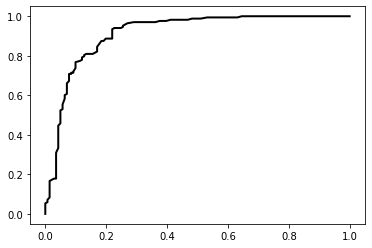

Random Data Processing for horizon =  3
Random data AUC =  0.9133738601823708


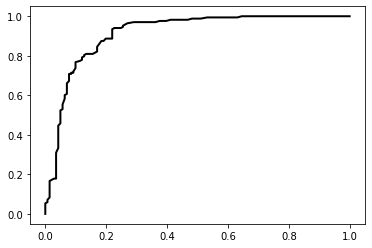

C =  200
Real_data_accuracy   :  0.8382
Random data_accuracy :  0.8608
Gain =  -0.0226
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.9467703349282297


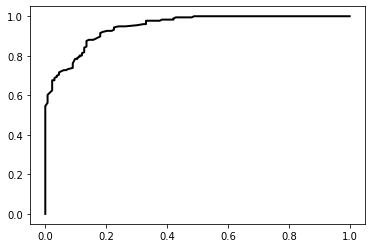

Random Data Processing for horizon =  5
Random data AUC =  0.9467703349282297


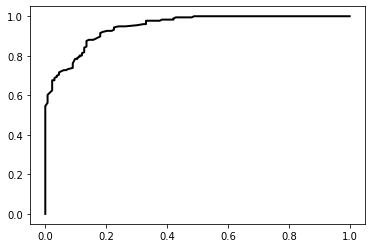

C =  200
Real_data_accuracy   :  0.8706
Random data_accuracy :  0.8608
Gain =  0.0098
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.9593590645331458


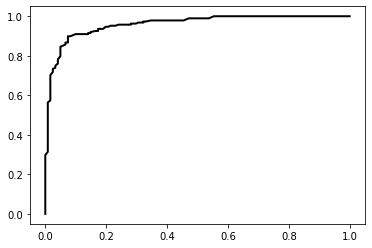

Random Data Processing for horizon =  10
Random data AUC =  0.9593590645331458


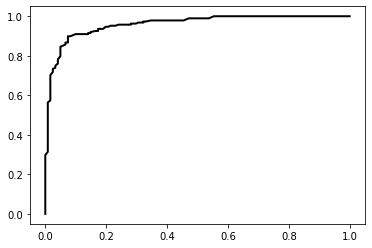

C =  200
Real_data_accuracy   :  0.8932
Random data_accuracy :  0.8932
Gain =  -0.0
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9741955069823922


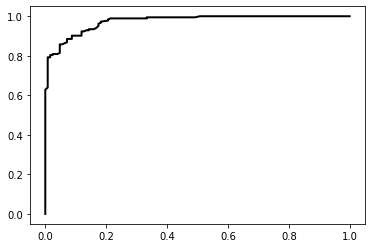

Random Data Processing for horizon =  20
Random data AUC =  0.9741955069823922


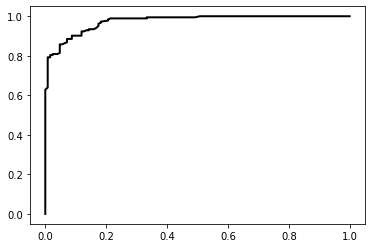

C =  200
Real_data_accuracy   :  0.9029
Random data_accuracy :  0.8997
Gain =  0.0032
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9891027391027392


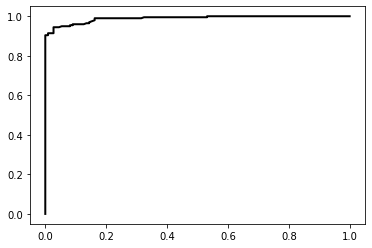

Random Data Processing for horizon =  40
Random data AUC =  0.9891027391027392


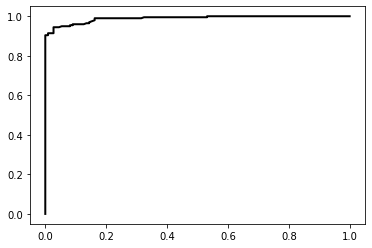

C =  200
Real_data_accuracy   :  0.9385
Random data_accuracy :  0.9353
Gain =  0.0032
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9961141170683719


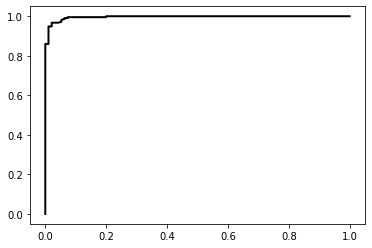

Random Data Processing for horizon =  60
Random data AUC =  0.9961141170683719


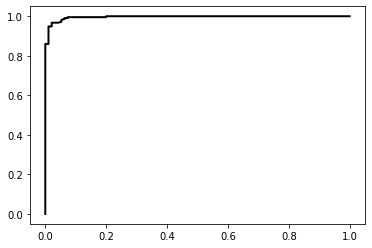

C =  200
Real_data_accuracy   :  0.9676
Random data_accuracy :  0.9709
Gain =  -0.0033
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9951608025002521


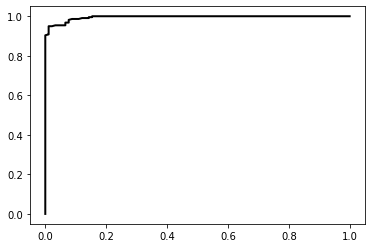

Random Data Processing for horizon =  120
Random data AUC =  0.9951608025002521


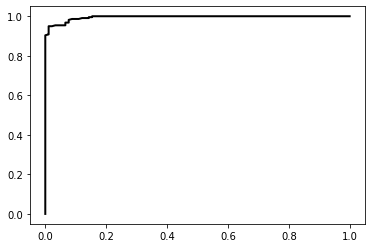

C =  200
Real_data_accuracy   :  0.9547
Random data_accuracy :  0.9547
Gain =  0.0
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9983099489795919


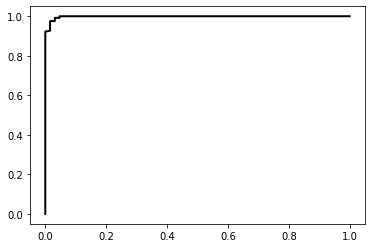

Random Data Processing for horizon =  250
Random data AUC =  0.9983099489795919


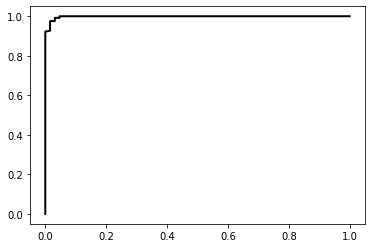

C =  200
Real_data_accuracy   :  0.9838
Random data_accuracy :  0.9838
Gain =  -0.0
---------------------------------------------

TIP
Real Data Processing for horizon =  1
AUC good =  0.8668300653594772


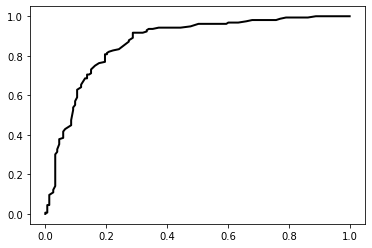

Random Data Processing for horizon =  1
Random data AUC =  0.8668300653594772


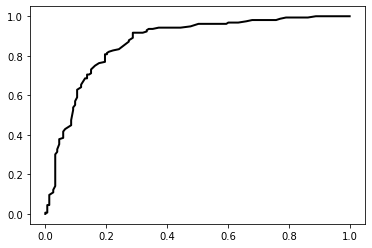

C =  200
Real_data_accuracy   :  0.7832
Random data_accuracy :  0.8123
Gain =  -0.0291
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.8878089652283201


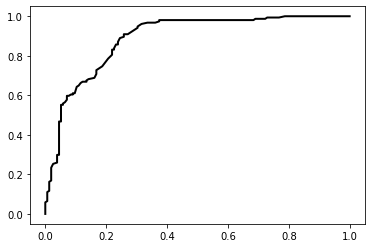

Random Data Processing for horizon =  3
Random data AUC =  0.8878089652283201


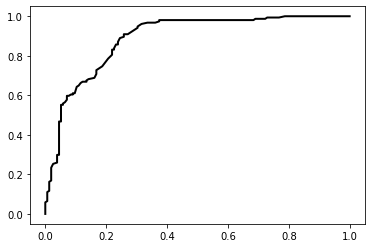

C =  200
Real_data_accuracy   :  0.7799
Random data_accuracy :  0.7994
Gain =  -0.0195
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.930921052631579


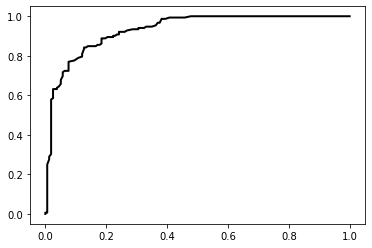

Random Data Processing for horizon =  5
Random data AUC =  0.930921052631579


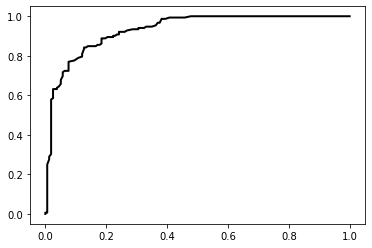

C =  200
Real_data_accuracy   :  0.8511
Random data_accuracy :  0.8317
Gain =  0.0194
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.9576629797218033


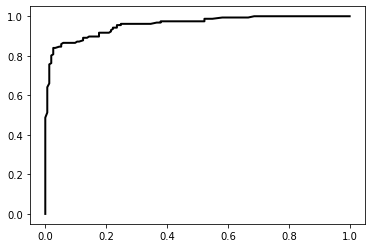

Random Data Processing for horizon =  10
Random data AUC =  0.9576629797218033


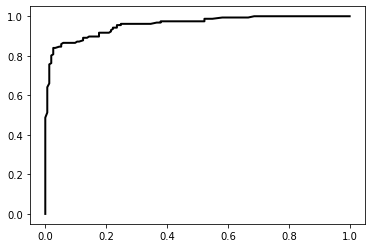

C =  200
Real_data_accuracy   :  0.8738
Random data_accuracy :  0.8803
Gain =  -0.0065
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9660283866633073


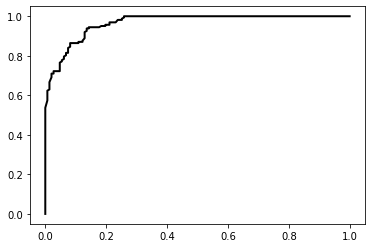

Random Data Processing for horizon =  20
Random data AUC =  0.9660283866633073


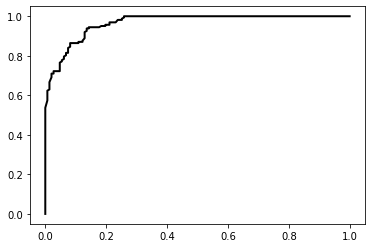

C =  200
Real_data_accuracy   :  0.8803
Random data_accuracy :  0.8867
Gain =  -0.0064
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9690916736753575


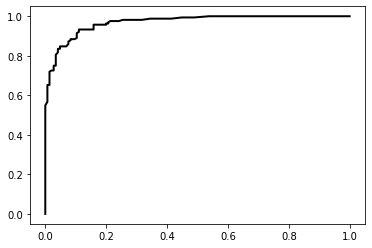

Random Data Processing for horizon =  40
Random data AUC =  0.9690916736753575


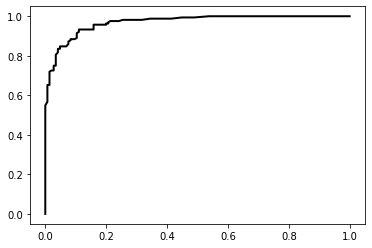

C =  200
Real_data_accuracy   :  0.8964
Random data_accuracy :  0.8964
Gain =  -0.0
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9816652649285114


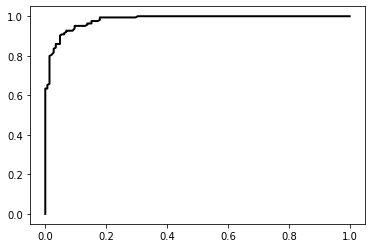

Random Data Processing for horizon =  60
Random data AUC =  0.9816652649285114


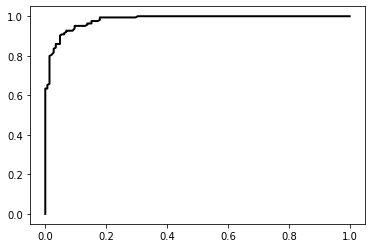

C =  200
Real_data_accuracy   :  0.9223
Random data_accuracy :  0.9288
Gain =  -0.0065
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9934343434343434


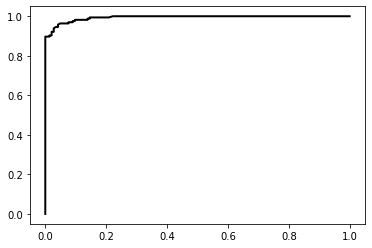

Random Data Processing for horizon =  120
Random data AUC =  0.9934343434343434


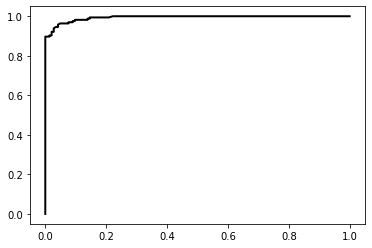

C =  200
Real_data_accuracy   :  0.9579
Random data_accuracy :  0.9547
Gain =  0.0032
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9999574286930609


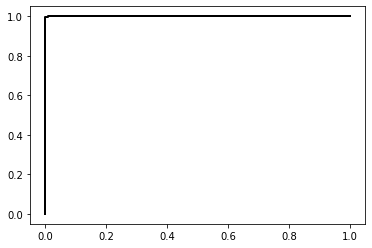

Random Data Processing for horizon =  250
Random data AUC =  0.9999574286930609


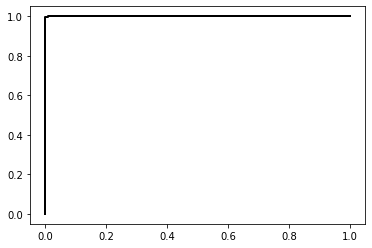

C =  200
Real_data_accuracy   :  0.9935
Random data_accuracy :  1.0
Gain =  -0.0065
---------------------------------------------

IYR
Real Data Processing for horizon =  1
AUC good =  0.7497641307144695


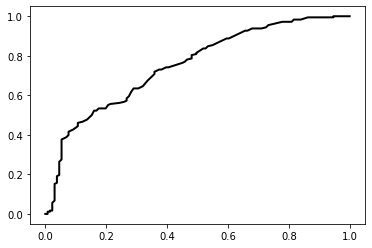

Random Data Processing for horizon =  1
Random data AUC =  0.7497641307144695


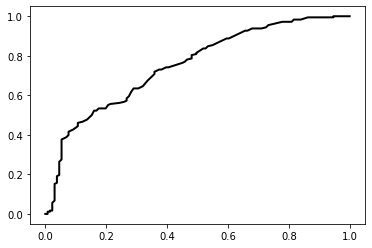

C =  200
Real_data_accuracy   :  0.6602
Random data_accuracy :  0.6699
Gain =  -0.0097
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.8943281128320498


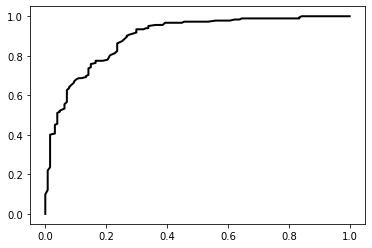

Random Data Processing for horizon =  3
Random data AUC =  0.8943281128320498


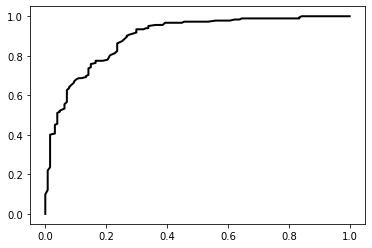

C =  200
Real_data_accuracy   :  0.822
Random data_accuracy :  0.8382
Gain =  -0.0162
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.9290484864255356


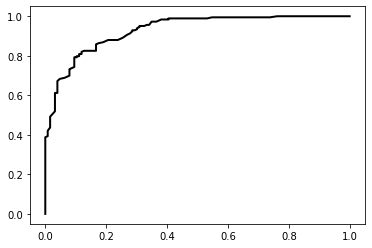

Random Data Processing for horizon =  5
Random data AUC =  0.9290484864255356


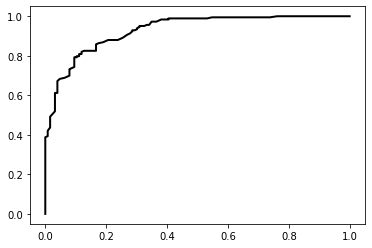

C =  200
Real_data_accuracy   :  0.8317
Random data_accuracy :  0.8285
Gain =  0.0032
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.9344336765596607


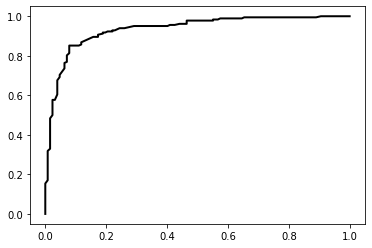

Random Data Processing for horizon =  10
Random data AUC =  0.9344336765596607


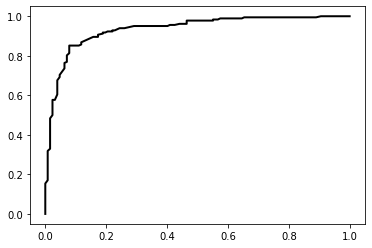

C =  200
Real_data_accuracy   :  0.8706
Random data_accuracy :  0.8706
Gain =  0.0
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.982253693504677


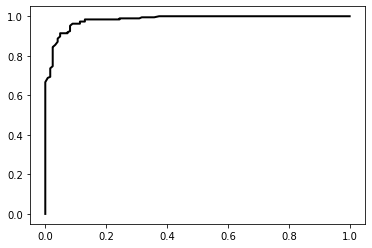

Random Data Processing for horizon =  20
Random data AUC =  0.982253693504677


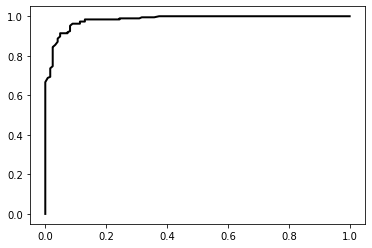

C =  200
Real_data_accuracy   :  0.9385
Random data_accuracy :  0.9223
Gain =  0.0162
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9883391455972101


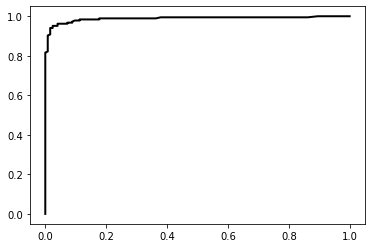

Random Data Processing for horizon =  40
Random data AUC =  0.9883391455972101


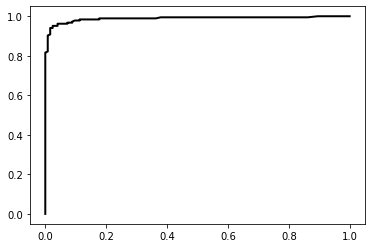

C =  200
Real_data_accuracy   :  0.9579
Random data_accuracy :  0.9547
Gain =  0.0032
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9897435897435898


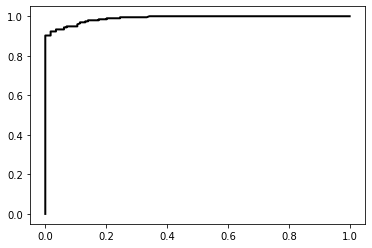

Random Data Processing for horizon =  60
Random data AUC =  0.9897435897435898


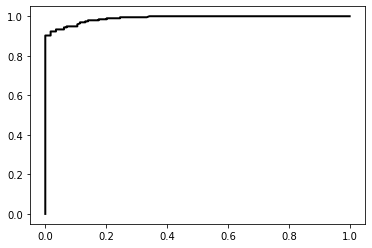

C =  200
Real_data_accuracy   :  0.9385
Random data_accuracy :  0.945
Gain =  -0.0065
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.999422268907563


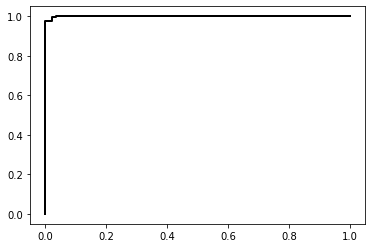

Random Data Processing for horizon =  120
Random data AUC =  0.999422268907563


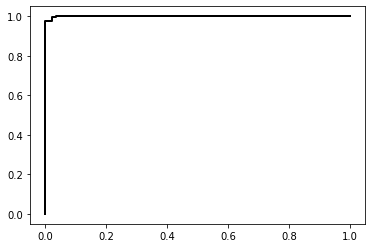

C =  200
Real_data_accuracy   :  0.9903
Random data_accuracy :  0.9903
Gain =  0.0
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9879562043795621


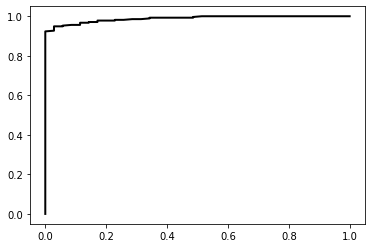

Random Data Processing for horizon =  250
Random data AUC =  0.9879562043795621


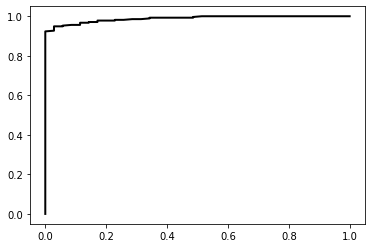

C =  200
Real_data_accuracy   :  0.9579
Random data_accuracy :  0.9579
Gain =  -0.0
---------------------------------------------

GLD
Real Data Processing for horizon =  1
AUC good =  0.6524528301886793


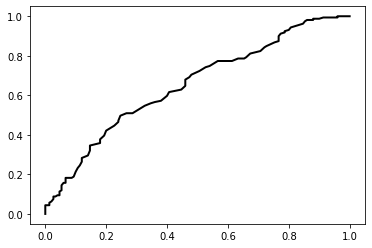

Random Data Processing for horizon =  1
Random data AUC =  0.6524528301886793


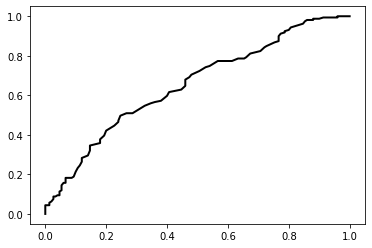

C =  200
Real_data_accuracy   :  0.6084
Random data_accuracy :  0.6505
Gain =  -0.0421
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.8081146785145445


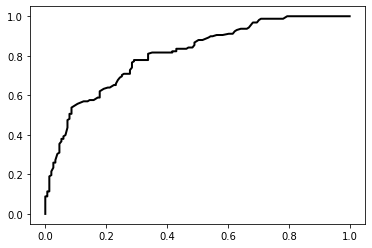

Random Data Processing for horizon =  3
Random data AUC =  0.8081146785145445


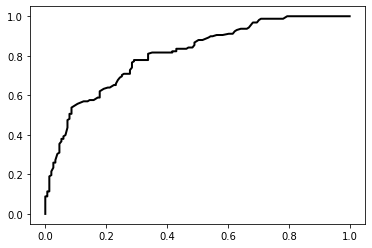

C =  200
Real_data_accuracy   :  0.712
Random data_accuracy :  0.7087
Gain =  0.0033
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.8990110626885685


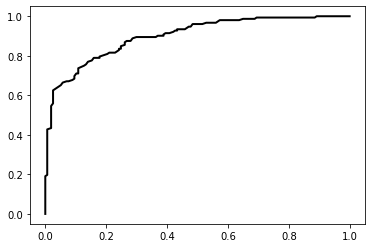

Random Data Processing for horizon =  5
Random data AUC =  0.8990110626885685


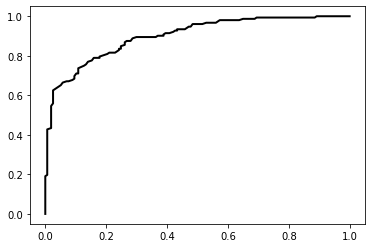

C =  200
Real_data_accuracy   :  0.7961
Random data_accuracy :  0.8026
Gain =  -0.0065
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.9182914530632826


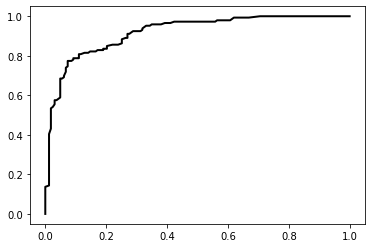

Random Data Processing for horizon =  10
Random data AUC =  0.9182914530632826


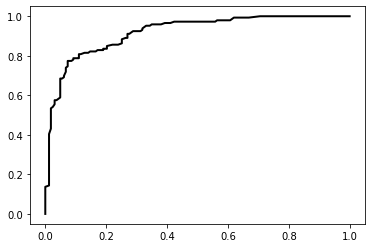

C =  200
Real_data_accuracy   :  0.8285
Random data_accuracy :  0.835
Gain =  -0.0065
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9501224248564674


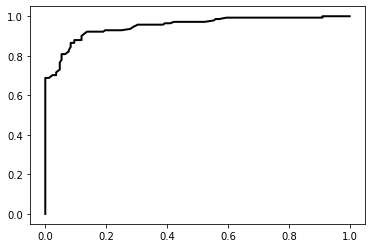

Random Data Processing for horizon =  20
Random data AUC =  0.9501224248564674


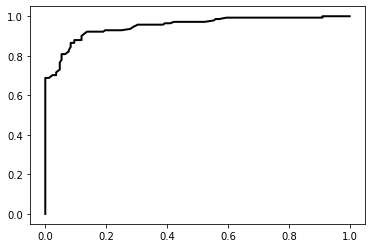

C =  200
Real_data_accuracy   :  0.8706
Random data_accuracy :  0.8706
Gain =  0.0
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9721513979250922


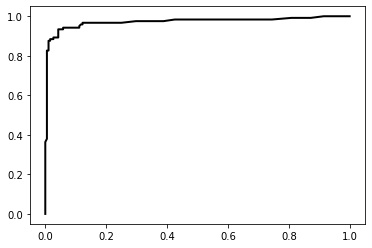

Random Data Processing for horizon =  40
Random data AUC =  0.9721513979250922


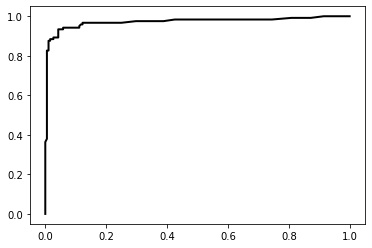

C =  200
Real_data_accuracy   :  0.9353
Random data_accuracy :  0.9353
Gain =  0.0
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.986531579456427


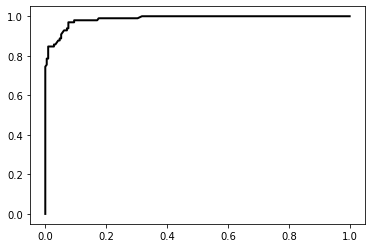

Random Data Processing for horizon =  60
Random data AUC =  0.986531579456427


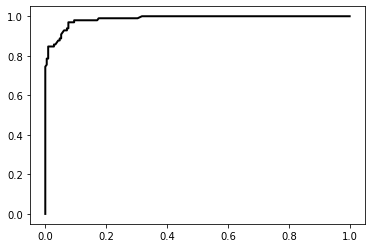

C =  200
Real_data_accuracy   :  0.9288
Random data_accuracy :  0.9288
Gain =  -0.0
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9785582064993831


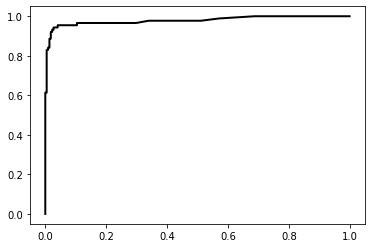

Random Data Processing for horizon =  120
Random data AUC =  0.9785582064993831


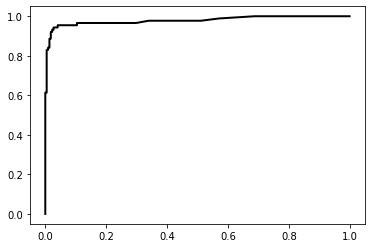

C =  200
Real_data_accuracy   :  0.9612
Random data_accuracy :  0.9547
Gain =  0.0065
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9975946712717405


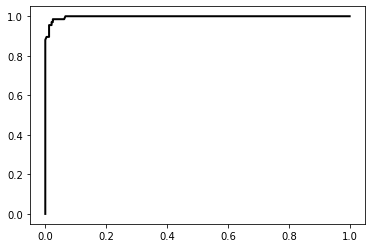

Random Data Processing for horizon =  250
Random data AUC =  0.9975946712717405


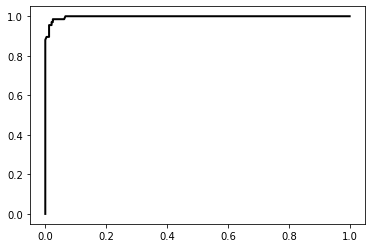

C =  200
Real_data_accuracy   :  0.9676
Random data_accuracy :  0.9676
Gain =  -0.0
---------------------------------------------

FXE
Real Data Processing for horizon =  1
AUC good =  0.6655303030303029


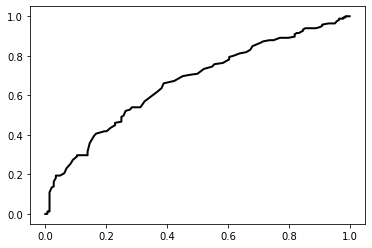

Random Data Processing for horizon =  1
Random data AUC =  0.6655303030303029


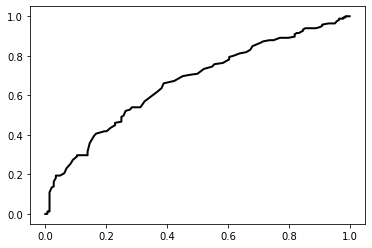

C =  200
Real_data_accuracy   :  0.6214
Random data_accuracy :  0.6149
Gain =  0.0065
---------------------------------------------

Real Data Processing for horizon =  3
AUC good =  0.862395134228188


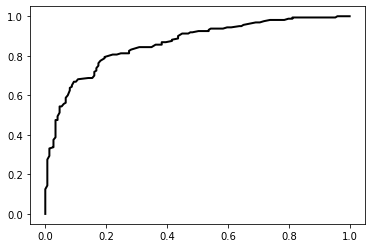

Random Data Processing for horizon =  3
Random data AUC =  0.862395134228188


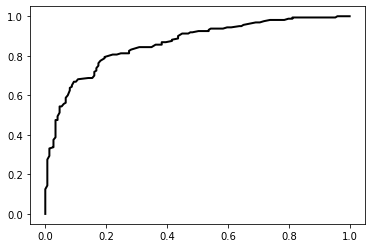

C =  200
Real_data_accuracy   :  0.7767
Random data_accuracy :  0.7864
Gain =  -0.0097
---------------------------------------------

Real Data Processing for horizon =  5
AUC good =  0.9194001677852349


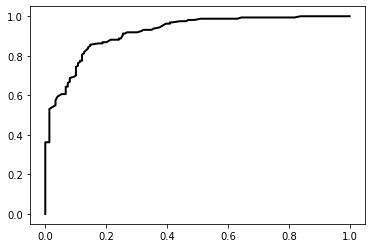

Random Data Processing for horizon =  5
Random data AUC =  0.9194001677852349


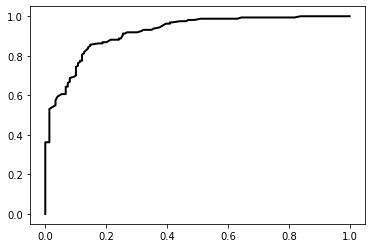

C =  200
Real_data_accuracy   :  0.8414
Random data_accuracy :  0.8317
Gain =  0.0097
---------------------------------------------

Real Data Processing for horizon =  10
AUC good =  0.939559748427673


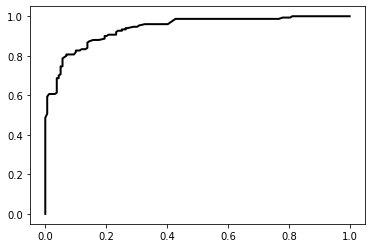

Random Data Processing for horizon =  10
Random data AUC =  0.939559748427673


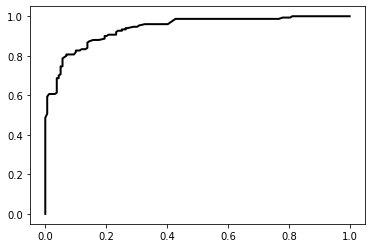

C =  200
Real_data_accuracy   :  0.8576
Random data_accuracy :  0.8608
Gain =  -0.0032
---------------------------------------------

Real Data Processing for horizon =  20
AUC good =  0.9565602836879432


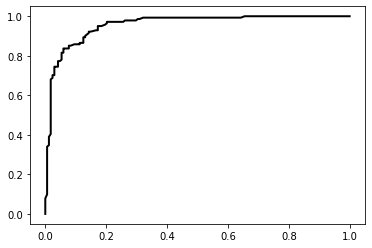

Random Data Processing for horizon =  20
Random data AUC =  0.9565602836879432


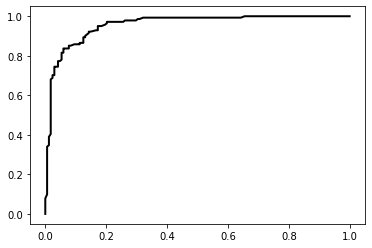

C =  200
Real_data_accuracy   :  0.8867
Random data_accuracy :  0.8835
Gain =  0.0032
---------------------------------------------

Real Data Processing for horizon =  40
AUC good =  0.9875209731543624


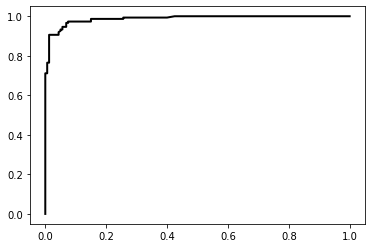

Random Data Processing for horizon =  40
Random data AUC =  0.9875209731543624


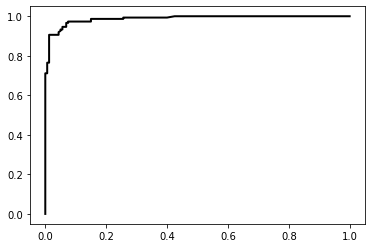

C =  200
Real_data_accuracy   :  0.9385
Random data_accuracy :  0.945
Gain =  -0.0065
---------------------------------------------

Real Data Processing for horizon =  60
AUC good =  0.9846546774738264


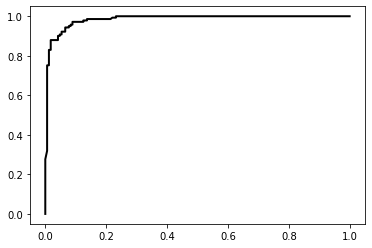

Random Data Processing for horizon =  60
Random data AUC =  0.9846546774738264


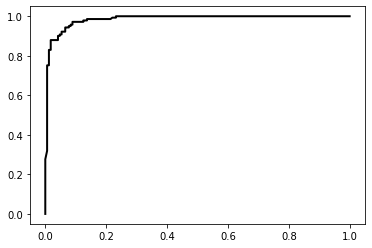

C =  200
Real_data_accuracy   :  0.9288
Random data_accuracy :  0.9353
Gain =  -0.0065
---------------------------------------------

Real Data Processing for horizon =  120
AUC good =  0.9916068183784719


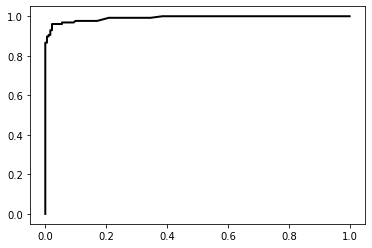

Random Data Processing for horizon =  120
Random data AUC =  0.9916068183784719


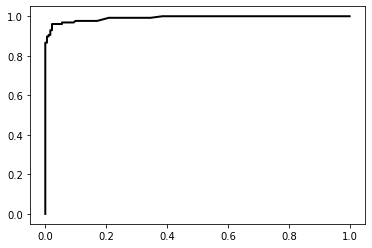

C =  200
Real_data_accuracy   :  0.9612
Random data_accuracy :  0.9547
Gain =  0.0065
---------------------------------------------

Real Data Processing for horizon =  250
AUC good =  0.9992966414629858


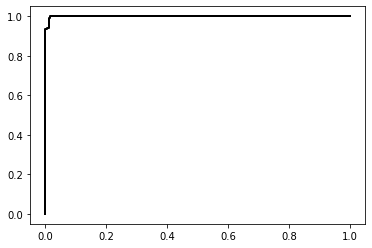

Random Data Processing for horizon =  250
Random data AUC =  0.9992966414629858


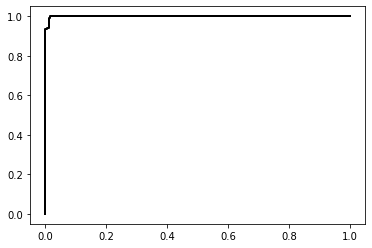

C =  200
Real_data_accuracy   :  0.9806
Random data_accuracy :  0.9773
Gain =  0.0033
---------------------------------------------

Wall time: 15min 59s


In [18]:
%%time


all_result = {}

for i in df_col:
    
    print(i)
    
    sub_result = {}
    
    for j in td:
                
        y_col = str(i)+"_"+str(j)+"_y"
        p_col = str(i)+"_p"
        v_col = str(i)+"_v"
                
        X = df.drop([y_col,p_col,v_col, "date","month","week"], axis = 1)
        y = df[y_col]
        
        r_X = r_df.drop([y_col,p_col,v_col,"date","month","week"], axis = 1)
        r_y = r_df[y_col]
                
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                            test_size=0.3,
                                                            random_state=0)
        
        r_X_train, r_X_test, r_y_train, r_y_test = train_test_split(r_X, r_y, 
                                                            test_size=0.3,
                                                            random_state=0)
        
        sc = StandardScaler()
        sc.fit(X_train)
        X_train_std = sc.transform(X_train)
        X_test_std = sc.transform(X_test)
        
        r_sc = StandardScaler()
        r_sc.fit(r_X_train)
        r_X_train_std = r_sc.transform(X_train)
        r_X_test_std = r_sc.transform(X_test)
        
        
        print("Real Data Processing for horizon = ",j)
        
        maxval = -10000.0
        c = 0.0
        sval = 0.0
        
        
        
        for numtrees in {100,200,300}:
            lw=2
            clf = RandomForestClassifier(n_estimators=numtrees, 
                                         criterion='gini')
            
            scores = cross_val_score(clf, X_train_std, y_train, cv=3)
            ascores = scores.mean()
            
            r_scores = cross_val_score(clf, r_X_train_std, r_y_train, cv=3)
            r_ascores = scores.mean()
            
            
            real_random = ascores - r_ascores
            
            sval = sval + real_random
            
            if maxval < real_random:
                
                maxval = real_random
                c = numtrees
                
        clf = RandomForestClassifier(n_estimators=int(c),criterion='gini')
        clf.fit(X_train_std,y_train)

        predictions = clf.predict(X_test_std)
        probs = clf.predict_proba(X_test_std)


        fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        print ("AUC good = ",roc_auc)        
        plt.plot(fpr, tpr, lw=lw, color='black')
        #plt.title("Horizon = "+str(filename))
        plt.show()
        
        
        print("Random Data Processing for horizon = ",j)
        
        
        clf = RandomForestClassifier(n_estimators=int(c),criterion='gini')
        clf.fit(r_X_train_std,y_train)

        r_predictions = clf.predict(r_X_test_std)
        r_probs = clf.predict_proba(r_X_test_std)


        fpr, tpr, thresholds = roc_curve(r_y_test, probs[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        print ("Random data AUC = ",roc_auc)        
        plt.plot(fpr, tpr, lw=lw, color='black')
        #plt.title("Horizon = "+str(filename))
        plt.show()
        
        print ("C = ",c)
        real_accuracy = round(metrics.accuracy_score(y_test, predictions),4)
        random_accuracy = round(metrics.accuracy_score(r_y_test, r_predictions),4)
        
        print("Real_data_accuracy   : ", real_accuracy)
        print("Random data_accuracy : ", random_accuracy)
                
        gain = (real_accuracy - metrics.accuracy_score(r_y_test,r_predictions))
        
        print ("Gain = ",round(gain,4))
        print ("---------------------------------------------\n")
        
        v_real_accuracy = str(j) + "_real_accuracy"
        v_random_accuracy = str(j) + "_random_accuracy"
        v_gain = str(j) +"_gain"
        
        sub_result[v_real_accuracy] = real_accuracy 
        sub_result[v_random_accuracy] = random_accuracy
        sub_result[v_gain] = gain
        
    all_result[i] = sub_result

In [19]:
all_result

{'SPY': {'1_real_accuracy': 0.8447,
  '1_random_accuracy': 0.835,
  '1_gain': 0.009748543689320432,
  '3_real_accuracy': 0.8608,
  '3_random_accuracy': 0.8576,
  '3_gain': 0.0031948220064724753,
  '5_real_accuracy': 0.8867,
  '5_random_accuracy': 0.8738,
  '5_gain': 0.012913592233009807,
  '10_real_accuracy': 0.8511,
  '10_random_accuracy': 0.8479,
  '10_gain': 0.003203559870550099,
  '20_real_accuracy': 0.9061,
  '20_random_accuracy': 0.9191,
  '20_gain': -0.01299385113268603,
  '40_real_accuracy': 0.9385,
  '40_random_accuracy': 0.9417,
  '40_gain': -0.0032475728155340056,
  '60_real_accuracy': 0.9612,
  '60_random_accuracy': 0.9612,
  '60_gain': 3.495145631071672e-05,
  '120_real_accuracy': 0.9838,
  '120_random_accuracy': 0.9806,
  '120_gain': 0.003217475728155339,
  '250_real_accuracy': 0.9773,
  '250_random_accuracy': 0.9773,
  '250_gain': -4.6278317152204096e-05},
 'IWM': {'1_real_accuracy': 0.7994,
  '1_random_accuracy': 0.7735,
  '1_gain': 0.025937216828478937,
  '3_real_accur

In [20]:
final_results = pd.DataFrame(all_result)

In [21]:
final_results

,SPY,IWM,EEM,TLT,LQD,TIP,IYR,GLD,FXE
1_real_accuracy,0.844700,0.799400,0.715200,0.815500,0.779900,0.783200,0.660200,0.608400,0.621400
1_random_accuracy,0.835000,0.773500,0.734600,0.822000,0.763800,0.812300,0.669900,0.650500,0.614900
1_gain,0.009749,0.025937,-0.019428,-0.006506,0.016146,-0.029098,-0.009703,-0.042085,0.006513
3_real_accuracy,0.860800,0.854400,0.783200,0.854400,0.838200,0.779900,0.822000,0.712000,0.776700
3_random_accuracy,0.857600,0.857600,0.767000,0.860800,0.860800,0.799400,0.838200,0.708700,0.786400
3_gain,0.003195,-0.003205,0.016210,-0.006441,-0.022641,-0.019453,-0.016188,0.003262,-0.009708
5_real_accuracy,0.886700,0.870600,0.841400,0.831700,0.870600,0.851100,0.831700,0.796100,0.841400
5_random_accuracy,0.873800,0.877000,0.851100,0.828500,0.860800,0.831700,0.828500,0.802600,0.831700
5_gain,0.012914,-0.006423,-0.009733,0.003221,0.009759,0.019385,0.003221,-0.006489,0.009685
10_real_accuracy,0.851100,0.864100,0.847900,0.851100,0.893200,0.873800,0.870600,0.828500,0.857600


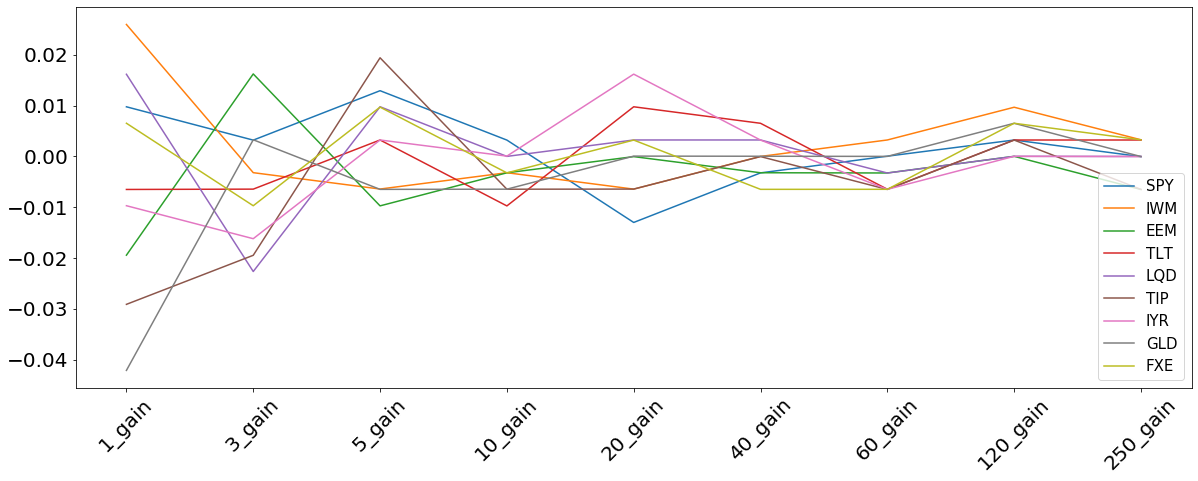

In [22]:
plt.figure(figsize = (20,7))
plt.plot(final_results[final_results.index.str.contains('gain')])
plt.xticks(rotation = 45, fontsize = 20)
plt.legend(final_results.columns, fontsize=15)
plt.yticks(fontsize = 20)
plt.show()

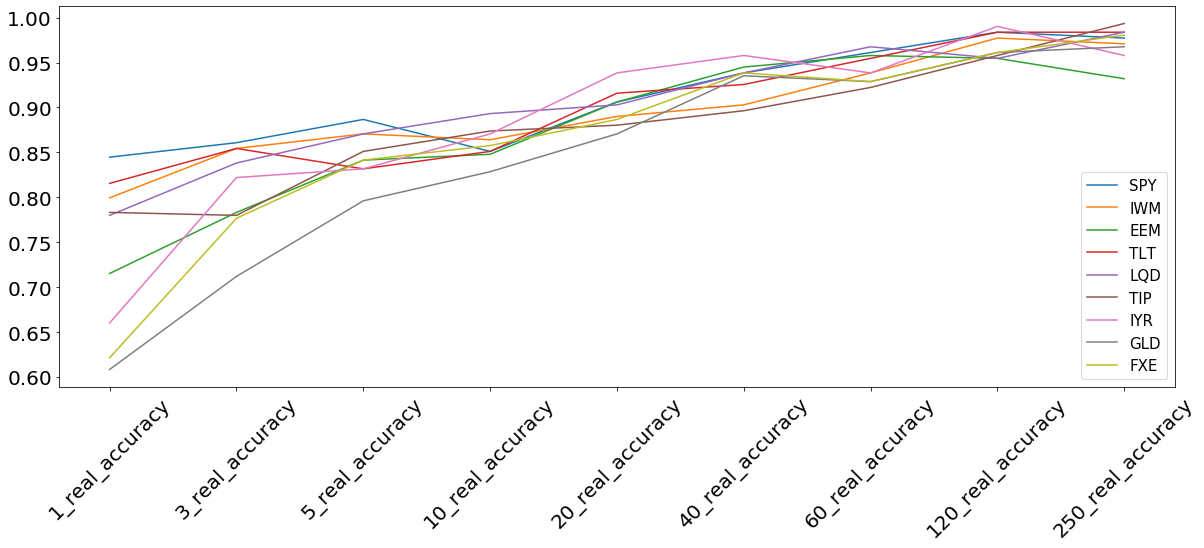

In [23]:
plt.figure(figsize = (20,7))
plt.plot(final_results[final_results.index.str.contains('real_accuracy')])
plt.xticks(rotation = 45, fontsize = 20)
plt.legend(final_results.columns, fontsize=15)
plt.yticks(fontsize = 20)
plt.show()